<h1 align="center">Statistics for Machine Learning</h1>
<h2 align="center">Hypothesis Testing and p-Values</h2>

&nbsp;

### Overview

Hypothesis testing is a statistical test from inferential statistics to determine if measurements are *significant*. That is are the measurements *different enough* from what was expected to be considered *significantly different*, and so are caused by external factors. This is useful for real-world applications such as medical trials for example, where the time to cure patients with a new drug should be compared to an existing drug. If the patients are cured in a shorter amount of time with the new drug, can we say the new drug is performing well or could the results be due to random chance? A hypothesis test can answer this question. $p$-Values are a way to quantify our confidence in these results.

### Contents

Section 1 - What is Hypothesis Testing?

Section 2 - Setting up a Hypothesis Test

Section 3 - Coin Flips Example (Discrete)

Section 4 - Height Example (Continuous)

Section 5 - Glossary

Section 6 - References

### Loading the Data

The SOCR dataset from UCLA contains height and weight information for 25,000 18 year olds, who form the population for this notebook [1]. Unlike *Population Parameters for Normal Distributions* and *Sampling a Distribution & Bessel's Correction*, this notebook only works with the height data, which is used to form the example in Section 4.

In [6]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad

In [7]:
df = pd.read_csv('datasets/SOCR-HeightWeight.csv', sep=',')
heights = list(df['Height(Inches)'])

heights.sort()

print(f'Number of rows: {len(df)}')

Number of rows: 25000


<center><h2>Section 1 - What is Hypothesis Testing?</h2></center>

### 1.1 - Motivation for Hypothesis Testing

In *Sampling a Distribution & Bessel's Correction*, we showed that a small number of samples can be used to estimate population parameters, without having to take measurements for an entire population. In *Population Parameters for Normal Distributions*, we saw how once the population parameters were known, we could answer questions such as 'what is the probability that a person in the population is taller than 70 inches?'.

This notebook will look at tackling slightly different questions. Here, a measurement will be given and the task is to figure out if the measurement is **significantly** different from a population. To explain this concept, we will work through two examples: an example with a discrete random variable, and an example with a continuous random variable.

The first example will consider a coin that is flipped 5 times and lands on heads everytime - since the outcomes of flipping a coin are either heads or tails, this random variable is discrete. Given all the combinations of heads and tails the coin could have landed on, is 10 heads in a row different enough (significantly different) from what a normal coin would land on? If it is, then the coin is unlikely to be a regular coin, and is more likely to be weighted or biased in some way. If 5 consecutive heads is not that uncommon, then the we do not have enough information to determine if the coin is biased or not. Maybe it is, but the coin hasn't been flipped enough times to say.

The second example will consider the height of a person who is 73 inches tall - since height can be any decimal value, this random variable is continuous. Given the heights of people in the population, is 73 inches significantly different? If so, then the person is probably from a different population of people. If not, we can't say  if the person is from the population or not, maybe they aren't - but we don't have enough evidence to suggest otherwise.

The test we perform to find out the answer to these questions is called a **Hypothesis Test**, and is one of the most important statistical tests. It can be used to determine if a new drug is better at curing illness, if safety measures have reduced road traffic collisions, and much more.

&nbsp;

### 1.2 - Introduction to $p$-Values

The last section was deliberately vague, and made statements such as "different enough" and "significantly different". But how do we quantify if a measurement is "different enough"? The answer is by using **$p$-values**. The term $p$-value is short for probability value, and is a number between 0 and 1. This value is the probability that a measurement we have made was due to random chance, and not because anything is actually different about the item we are measuring.

This part is very important, and so here is is again for emphasis:
> A $p$-value is the probability that a measurement we have made was due to random chance, and not because anything is actually different about the item we are measuring.

If the $p$-value is very low (usually < 0.05), it is very unlikely that a measurement was due to random chance, and so we can have high confidence that the result was caused by external factors (such as the coin being biased, or the person being from a different population). If the $p$-value is very high, the measurement is very typical of the population data, and so we have no evidence to suggest there is anything different about the measurement. Note that this is not the same as saying there measurement is definitely from the population, all we can say is that we have do not have enough evidence to say otherwise.

The method for calculating $p$-values is shown later in the notebook.

&nbsp;

<center><h2>Section 2 - Setting up a Hypothesis Test</h2></center>

### 2.1 - Approach to a Hypothesis Test

To answer the question 'is a measurement significantly different?', it is actually easier to assume a measurement is not different, and then disprove the assumption. We ask the question this way around because $p$-values give the probability that a measurement was due to random chance, and NOT because the item (e.g. coin, height etc) was different. Hence, we must assume the observation was due to random chance, then either disprove or do not disprove the assumption using a $p$-value.

&nbsp;

### 2.2 - Hypothesis Test Overview

Below is an overview of the steps for setting up a hypothesis test. The next two sections will walk through examples for discrete and continuous random variables respectively. Note the overall method is the same for both, but the way you work through some of the steps is slightly different - see those sections for the details.

&nbsp;

**Step 1)** Write down the Null Hypothesis, $H_0$

The first step in performing a hypothesis test is to write down what we are going to test. In the coin flip example, this would be: 'The coin is not biased'. Because we always test if a result is NOT significantly different, we call this statement the **Null Hypothesis**. This name emphasises the fact that the test is always checking that there is no difference. The null hypothesis is denoted $H_0$.

&nbsp;

**Step 2)** Write down the Alternative Hypothesis, $H_1$

The **Alternative Hypothesis** is the case where there IS a difference between the two items. For example, the alternative hypothesis for the coin flip would be: 'The coin is biased'. The alternative hypothesis is denoted $H_1$.

&nbsp;

**Step 3)** Find the $p$-value

Next, find the $p$-value - this will tell us the probability the measurement was due to random chance. If the probability is very low we can determine that the measurement is likely explained by external factors (such as the coin being weighted). We can set the limit of what we consider 'very low' to different values depending on the problem. The mathematical name for this threshold is the **level of significance** and is represented by $\alpha$. The value of $\alpha$ is generally 0.05, and so $p$-values lower than this are rare enough for the measurement to be considered significant. However in more critical experiments, such as medical trials, you might want $\alpha$ value much lower so that you can be more confident that the results are not due to random chance.

&nbsp;

**Step 4)** Make a Conclusion

If the $p$-value is less than the level of significance ($p$ < $\alpha$), then the measurement is significantly different and the null hypothesis was wrong. So we **reject the null hypothesis**. This is a key phrase that is commonly heard in statistics. If the $p$-value is not less than the level of significance we cannot say whether the result is significant or not, and so we **fail to reject the null hypothesis**. For example, maybe the coin WAS biased, but we haven't flipped it enough times yet to find that out. Note that this is not the same as saying that the coin is definitely normal, all we can say is that we don't have enough evidence to say otherwise.

&nbsp;

### 2.3 - Why use $\alpha$ < 0.05?

The value of $\alpha$ can be chosen depending on the experiment. Recall that a $p$-value is the probability that a measurement we have made was due to random chance. This means that for $\alpha$ = 0.05, we are willing to accept that 5% of the time the observation we made was actually due to random chance. 

In the examples of flipping a coin or measuring heights, this is probably a safe assumption, because nothing terrible happens if the conclusion is wrong. But in the case of medical trials where people could live or die depending on the effectiveness of a drug, it is critical we are very confident in the results of an experiment. We can increase our confidence by decreasing the value of $\alpha$ so that it is much more unlikely that the results were due to random chance. In cases such as these, alpha could be very small, for example $\alpha$ = 0.00001.

&nbsp;

### 2.4 - Calculating $p$-Values

The technical definition of a $p$-value has been held back so far to focus on the meaning and interpretation, more so than the mathematical formula. The value itself is simple to calculate, and is the sum of three parts:

&nbsp;

1) the probability of the specific outcome occurring

2) the probabilities of any equally likely outcomes occurring

3) the probabilities of any rarer outcomes occurring

&nbsp;

At first glance, the second and third terms might seem a bit confusing but these can be easily explained. What we are interested in with the $p$-value, is the probability that the measurement made was due to random chance. To find this, we are not so much interested in if the coin flipped all heads or all tails - it doesn't matter which. We are solely interested in whether the coin is exhibiting significantly different behaviour than expected. So we can add the probability of 5 consecutive tails to the probability of 5 consecutive heads.

To explain the third term it is helpful to use an example. Imagine there is a bag of 1000 marbles where 500 are blue, 2 are yellow and the remaining marbles are all unique colours (red, green etc). It doesn't matter that a yellow marble has a 2/1000 chance of being drawn, because 498 of the marbles have a 1/1000 chance of being drawn. The fact the yellow marble is 'rare' is not a special property here. Half the time a 'rare' marble will be drawn. Since the $p$-value should indicate whether an event is significant or not, it should encorporate this information somehow. The $p$-value accounts for this by adding the third term. In this case, the $p$-value for drawing a yellow marble is 0.5 (500/1000), which is much larger than 0.05. This indicates that the measurement is not due to random chance and is in fact likely a typical result for that population.

&nbsp;

### 2.5 - Finding $p$-Values in Tables

The $p$-value, as described above, is the sum of three parts. For a continuous problem however the sum can be simplified further. Recall that for a continuous random variable, the probability of a specific outcome occurring is 0. This means that the first part of the sum can be rejected. Using this same logic, the second part can also be rejected, since any probability equal to 0 will have no effect of the final value of the sum. This leaves only a single component: the probability of rarer outcomes. In the context of continuous random variables, the $p$-value can then be calculated simply by integrating under the probability density function, using the value of interest as the lower bound. For example, when examining a distribution of heights, the $p$-value of a measurement of 63 inches may need to be found. In this case, simply integrate to find the area underneath the Normal distribution curve between 63 and $\infin$. This gives the $p$-value for a measuring a person of height 63 inches within that population. To save integrating a difficult function such as the Normal distribution curve, the $p$-value for many different values of interest can be read from a table. These tables use the equation of a standard Normal distribution, which has a mean of 0 and a standard deviation of 1. Hence, to use these tables with non-standard, but still Normally-distributed curves (such as in the heights example), the variable needs to be converted to a **z-score** using the following formula:

&nbsp;

$\begin{align}
z = \frac{x - \mu}{\sigma}
\end{align}$

&nbsp;

where $x$ is the variable of interest (e.g. height), $\mu$ is the mean of the distribution, and $\sigma$ is the standard deviation of the distribution.

&nbsp;

### 2.6 - Rejection Regions and Critical Values

The $p$-value gives a level of confidence that we are required to have before an outcome can be deemed significant. This implies that there is a value beyond which the result is significant, and beyond in the other direction is insignificant. In other words, this is the point that acts as the border between producing a value of $p < \alpha$ and $p > \alpha$. This value is called a **critical value**, and the region the value encloses (infinitely in one direction) in which the null hypothesis can be rejected is called the **rejection region**.

&nbsp;

<center><h2>Section 3 - Coin Flips Example (Discrete)</h2></center>

### 3.1 - Write Null and Alternate Hypotheses

A coin is flipped 5 times, and lands on 5 consecutive heads. Using an $\alpha$ value of 0.05, is the result statistically significant enough to say that the coin is biased?

$H_0$: The coin is a normal coin, and so $p > 0.05$

$H_1$: The coin is biased, and so $p \leqslant 0.05$ 

&nbsp;

### 3.2 - Find the $p$-Value

To find the $p$-value we need to write out all the possible combinations that the coin could have landed on. A combination of diferent outcomes is called a **permutation**. For 5 coins flips, there will be 32 permutations since for each flip there are 2 outcomes: heads or tails. For 5 flips, there are 2 different outcomes per flip, so in total there are 2 x 2 x 2 x 2 x 2 (or $2^5$ = 32) possibilities. Note here that this is a distribution of a discrete random variable with only two possible outcomes, and so the coin flip is a *binomially-distributed* random variable.

These are listed below:

|       |       |       |       |       |       |
|-------|-------|-------|-------|-------|-------|
|       |       | HHHTT | TTTHH |       |       |
|       |       | HHTTH | TTHHT |       |       |
|       |       | HHTHT | TTHTH |       |       |
|       |       | HTHTH | THTHT |       |       |
|       |       | HTHHT | THTTH |       |       |
|       | HHHHT | HTTHH | THHTT | TTTTH |       |
|       | HHHTH | TTHHH | HHTTT | TTTHT |       |
|       | HHTHH | THHHT | HTTTH | TTHTT |       |
|       | HTHHH | THTHH | HTHTT | THTTT |       |
| HHHHH | THHHH | THHTH | HTTHT | HTTTT | TTTTT |

&nbsp;

Recall the the $p$-value is the sum of:

1) the probability of the specific outcome occurring

2) the probabilities of any equally likely outcomes occurring

3) the probabilities of any rarer outcomes occurring

&nbsp;

Substituting in the values for each of these:

1) 1 outcome is HHHHH out of 32 possibilities: $\frac{1}{32}$

2) Only TTTTT is the exact same probability as HHHHH: $\frac{1}{32}$

3) No outcomes are rarer than HHHHH: $\frac{0}{32}$

&nbsp;

Taking the sum of these 3 probabilities gives:

&nbsp;

$
p = \frac{1}{32} + \frac{1}{32} + \frac{0}{32} = \frac{1}{16} = 0.0625
$

&nbsp;

<style>
td, th {
   border: none!important;
}
</style>

### 3.3 Make a Conclusion

The $p$-value was 0.0625, meaning that 6.25% of the time, flipping a coin 5 times would give 5 heads or something equally rare/rarer. Because this is greater than the limit of significance (5%) we **fail to reject** the null hypothesis. This does not mean that the coin is definitely not biased, it could be biased. We just do not have enough evidence to say either way.

&nbsp;

### 3.4 - Note about Calculating $p$-Values for Discrete Random Variables

In the example above, all the possible permutations were written out in order to calculate the probabilities that made up $p$-value. If the coin had been flipped 100 times, it would be impractical to write down every permutation. We can instead use ${n \choose r}$ (pronounced 'n choose r'). This will give the probability values based on the number of permutations and arrangements of those permutations. This notebook has not covered that arrangements, and why the order of heads and tails does not matter, because this was not needed to understand the example given. These topics will however be covered in a notebook about Binomial Distributions.

&nbsp;

<center><h2>Section 4 - Height Example (Continuous)</h2></center>

### 4.1 - Write Null and Alternate Hypotheses

A person's height is measured to be 73 inches. Using an $\alpha$ value of 0.05, is the measurement different enough from the population to say that this person is likely from a different population group? [This refers to the population of 25,000 18 year olds measured in the SOCR dataset from UCLA. See *Population Parameters for Normal Distributions* and *Sampling a Distribution & Bessel's Correction* for more.]

$H_0$: The height is not significantly different so the person belongs to the population, $p > 0.05$

$H_1$: The height is significantly different so the person belongs to a different population, $p \leqslant 0.05$ 

&nbsp;

### 4.2 - Find the $p$-Value

Just as before, a $p$-value is the sum of:

1) the probability of the specific outcome occurring

2) the probabilities of any equally likely outcomes occurring

3) the probabilities of any rarer outcomes occurring

&nbsp;

Recall that for continuous random variables, probabilities are not calculated by listing out every possible value like with discrete random variables (e.g. every coin permutation). Instead, probability is calculated by finding the area under the curve given by the Probability Density Function (PDF). So to find each of these three components for the $p$-value, we need to find three areas.

**1) Component 1 - The Probability of the Specific Outcome Occurring**
The first component of a $p$-value is the probability that the exact outcome would occur, which in this case means the probability someone is measured to be exactly 73 inches. In terms of an area, this would be a 1-D line under the curve, since there is not a range of heights (e.g. between 72 and 73 inches), but rather a single value. Because of this, the area would be 0, meaning the probability someone is exactly 73 inches is 0. This is a property of continuous PDFs and is explained in more detail in Section 3.9 of *Population Parameters for Normal Distributions*.

&nbsp;

**2) Component 2 - The Probabilities of any Equally Likely Outcomes Occurring**
The second component here will also always be zero, since the probabilities that are equally likely are also zero. Because of this, the $p$-value for a continuous random variable will only ever be equal to the final component of the three listed above.

&nbsp;

**3) Component 3 - The Probabilities of any Rarer Outcomes Occurring**
This final component is the only portion of the $p$-value that can ever be non-zero for a continuous random variable. Any outcome rarer than a height of 73 inches is a height taller than 73 inches. So this part of the component refers to the area above x = 73 inches, since these heights show up less frequently in the distribution. Similarly, since a Normal distribution is symmetric about the mean, it is also just as rare for someone to be shorter than 63 inches (as this is the value on the opposite side of the distribution). 


&nbsp;

Overall, the $p$-value for a continuous random variable is the sum of the area for heights taller than 73 inches, and heights shorter than 63 inches. This is because these are equally rare. Using integration to solve for the these areas, the $p$-value is given by:

&nbsp;

$
p = 0.0042 + 0.0042 = 0.0084 (0.84\%)
$

&nbsp;

Since 0.84% is less than the 5% limit of significance, we can **reject the null hypothesis**. This means that we will **accept the alternative hypothesis**, and say that a person with height 73 inches was very unusual for this population so it is likely this person is from a different population. This does not mean that the person is definitely not from the population - after all there is 0.84% probability of an event this rare happening. But if we are willing to accept some level of uncertainty, we can be confident that 99.16% of the time this conclusion is accurate.

In [8]:
def mean(values):
    return sum(values)/len(values)

def variance(values):
    mu = mean(values)
    N = len(values)
    return sum([(x-mu)**2 for x in values]) / N

def stdev(values):
    return math.sqrt(variance(values))

def normal(x_values, mu=None, sigma=None):
    if mu == None:
        mu = mean(x_values)
    if sigma == None:
        sigma = stdev(x_values)

    return [(1/(sigma*math.sqrt(2*math.pi))) * math.e**(-1*(((x-mu)**2)/(2*(sigma**2)))) for x in x_values]

def height_integrand(x, mu, sigma):
    return (1/(sigma*math.sqrt(2*math.pi))) * math.e**(-1*(((x-mu)**2)/(2*(sigma**2))))

Probability height is above 73 inches: 0.0042 (0.42%)
Probability height is below 63 inches: 0.0042 (0.42%)


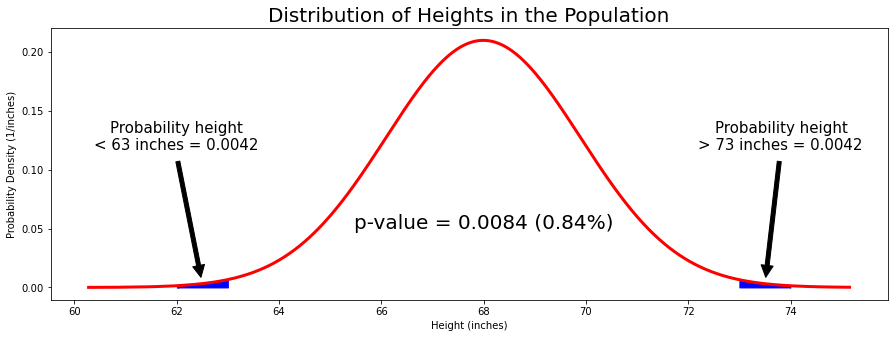

In [22]:
# Draw the figure
fig, ax =plt.subplots(figsize=(15,5))
ax.set_title('Distribution of Heights in the Population', fontsize=20)
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Probability Density (1/inches)')
ax.plot(heights, normal(heights), color='red', linewidth=3)
upper_x_range = np.linspace(73,74,100)
lower_x_range = np.linspace(62,63,100)
ax.fill_between(upper_x_range, normal(heights)[24900:], color='blue')
ax.fill_between(lower_x_range, normal(heights)[:100], color='blue')

# Calculate the probabilities
upper_p = quad(height_integrand, 73, 80, args=(mean(heights), stdev(heights)))[0]
lower_p = abs(quad(height_integrand, 62.98, 50, args=(mean(heights), stdev(heights)))[0])

ax.annotate(f'Probability height   \n> 73 inches = {lower_p:.4f}', 
            xy=(73.5, 0.003),
            xycoords='data',
            xytext=(0.97, 0.6), 
            fontsize=15,
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='center')

ax.annotate(f'Probability height\n< 63 inches = {upper_p:.4f}', 
            xy=(62.5, 0.003),
            xycoords='data',
            xytext=(0.15, 0.6), 
            fontsize=15,
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center',
            verticalalignment='center')

ax.annotate('p-value = 0.0084 (0.84%)',
            xy=(68, 0.05), 
            fontsize=20,
            horizontalalignment='center')

# Print the results
print(f'Probability height is above 73 inches: {upper_p:.4f} ({upper_p*100:.2f}%)')
print(f'Probability height is below 63 inches: {lower_p:.4f} ({lower_p*100:.2f}%)')

### 4.3 - Note on One-Tailed and Two-Tailed Tests

This example considered both the area for the heights above 73 inches, and area on the other side of the line of symmetry for heights below 63 inches. This is commonly how $p$-values are calculated for continuous random variables, and is called a **Two-Tailed Test**. It is possible to just consider the area on one side of the curve, which in this case is the heights above 73 inches - this is called a **One-Tailed Test**. In this example, a one-tailed test would also have been appropriate, since we are just interested in the probabilty of someone being tall. However in other cases this may not be appropriate. A medical test to determine if a drug is more effective should also consider the possibility of the drug being less effective. Failing to check both sides of the curve in this scenario could lead to some very dangerous outcomes. As a general rule, if you are unsure of which test to use then a two-tailed test is a safe bet. More information on deciding between one-tailed and two-tailed tests can be found in this resource [2].

&nbsp;

<center><h2>Section 4 - Conclusion</h2></center>

A hypothesis test is a useful technique to determine if a measurement was made due to random chance, or if the result was significant. The amount of confidence in the test can be controlled by using different values for the limit of significance. A typical value for this limit is 0.05 (5%), though smaller values can be used for more critical experiments (such as those in the medical industry).

&nbsp;

<center><h2>Section 5 - Glossary</h2></center>

**Alternate Hypothesis, $H_1$**
> A statement that there is a significant difference between a measurement and a population of measurements

**Critical Value**
> The point that acts as the border between producing a value of $p < \alpha$ and $p > \alpha$.
insignificant. 

**Hypothesis Testing**
> A statistical test to determine if a measurement is significantly different from a population of known measurements

**Level of Significance, $\alpha$**
> A chosen threshold for determining if the random chance a measurement was observed is low enough to accept the measurement is statistically significant

**Null Hypothesis, $H_0$**
> A statement that there is no significant difference between a measurement and a population of measurements

**One-Tailed Tests**
> A hypothesis test where the $p$-value is calculated using only the area of interest on one side of the curve

**$p$-Value**
> Short for 'probability value', the probability that a measurement was due to random chance, and not because anything is actually different about the item measured

**Rejection region**
>The region the enclosed by the critical value (infinitely in one direction) in which the null hypothesis can be rejected.

**Significantly Different**
> A difference between a measurement and a population of measurements that is larger enough that the measurement can be considered to belong to a different population.

**Two-Tailed Tests**
> A hypothesis test where the $p$-value is calculated using both the area of interest, and the corresponding area on the opposite side of the curve

**z-score**
> The value obtained when converting a measurement from a non-standard Normally-distributed random variable to a standard Normally-distributed random variable.

<center><h2>Section 6 - References</h2></center>

[1] Dataset background and download - [Kaggle](https://www.kaggle.com/burnoutminer/heights-and-weights-dataset/version/1)

[2] One-Tailed vs Two-Tailed Tests - [Statistics How To](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/#:~:text=A%20one%2Dtailed%20test%20is%20more%20powerful%20than%20a%20two,effect%20in%20the%20opposite%20direction.)